<a href="https://colab.research.google.com/github/noushadkhan01/tensorflow/blob/master/classification/bank_customers_calssification_for_exiting_the_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files
files.upload()

In [69]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
df.shape

(10000, 14)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [72]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## check for null values

In [73]:
df.isnull().sum().sort_values(ascending = False)[:2]

Exited             0
EstimatedSalary    0
dtype: int64

**^^as u can see there is no null value**

In [74]:
df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [75]:
np.log1p(df.Age).skew()

0.20336041516983316

## import important dependencies

In [0]:
import tensorflow as tf
from tensorflow import keras

In [77]:
df.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [78]:
df = df.iloc[:, 3:]
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [84]:
df = pd.get_dummies(df, drop_first = True)
df.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0,1,1,1,101348.88,1,0,0,0


In [85]:
X = df.drop('Exited', 1)
y = df.Exited
X.shape, y.shape

((10000, 11), (10000,))

## StandardScaler

We need to scale out data before applying to neural network becuase of speed

In [0]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 11), (3000, 11), (7000,), (3000,))

In [0]:
from sklearn.preprocessing import StandardScaler

In [89]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_train[:1], X_test[:1]

(array([[-0.09792126, -0.55759842, -1.03635146,  1.13249447,  0.81039385,
          0.64198477,  0.96683535, -0.76862426, -0.56987189, -0.5731713 ,
          0.92295821]]),
 array([[-0.56233235, -0.39245718,  1.00826365,  0.83794103, -0.87153075,
          0.65569297,  0.97823676,  1.61444413,  1.66826321, -0.57529746,
         -1.12586575]]))

In [119]:
y_train = y_train.values
y_test = y_test.values
y_train[:2], y_test[:2]

(array([1, 0]), array([0, 1]))

# Make ANN

In [0]:
from tensorflow import keras

## import Sequential from keras
**it is required to initialize our neural network model**

### Step 1:- create ann model by sequential

In [111]:
#1 first initialize our keras model by Sequential
model = keras.models.Sequential()
model

### Step 2:- Add dense layer

if a data is linenarly separable then their is no need to add hidden layer or don't even need a neural networks by convention

**Tip:-- ** no. of nodes in hidden layers is the average of no. of nodes in input layers and no. of node in output layer

In [110]:
ninput = 11 #no of independent variables
noutput = 1 #output is either 1 or either 0 so no of hidden layers in output is 1
nhidden = (ninput + noutput) / 2
nhidden

6.0

In [0]:
model.add(keras.layers.Dense(units = 6, activation = tf.nn.relu, input_dim = 11))

In [113]:
model

### add 2nd layer

In [114]:
model.add(keras.layers.Dense(units = 6, activation = tf.nn.relu))
model

### Step 3:- add output layer

**there are two types of activation function for output of categorical varibles **
- 1**softmax**, which is used when dependent varible have more than two categorical variables
- 2 **sigmoid** , which is used when dependent varable have 2 categorical variables

In [0]:
model.add(keras.layers.Dense(units = 1, activation = tf.nn.sigmoid))

In [117]:
model

## Step 4:-- compile the model
apply stochastic gradient descent method

In [118]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model

### Step 5:-- fit the model

batch_size = no. of observation afterwhich u want to update the weights

In [120]:
model.fit(X_train, y_train, batch_size = 10 , epochs = 100)

Epoch 1/100
7000/7000 [==============================] - 2s 246us/step - loss: 0.5145 - acc: 0.7784
Epoch 2/100
7000/7000 [==============================] - 1s 96us/step - loss: 0.4372 - acc: 0.8077
Epoch 3/100
7000/7000 [==============================] - 1s 105us/step - loss: 0.4112 - acc: 0.8157
Epoch 4/100
7000/7000 [==============================] - 1s 96us/step - loss: 0.3962 - acc: 0.8196
Epoch 5/100
7000/7000 [==============================] - 1s 95us/step - loss: 0.3866 - acc: 0.8219
Epoch 6/100
7000/7000 [==============================] - 1s 96us/step - loss: 0.3800 - acc: 0.8237
Epoch 7/100
7000/7000 [==============================] - 1s 96us/step - loss: 0.3751 - acc: 0.8261
Epoch 8/100
7000/7000 [==============================] - 1s 94us/step - loss: 0.3716 - acc: 0.8263
Epoch 9/100
7000/7000 [==============================] - 1s 96us/step - loss: 0.3683 - acc: 0.8296
Epoch 10/100
7000/7000 [==============================] - 1s 97us/step - loss: 0.3654 - acc: 0.8394
Epoch 1

### Step 7:- make predictions

In [121]:
y_pred = model.predict(X_test)
y_pred[:2]

array([[0.17092817],
       [0.29962748]], dtype=float32)

In [123]:
y_pred.max()

0.9448578

In [124]:
y_pred.min()

0.0009304676

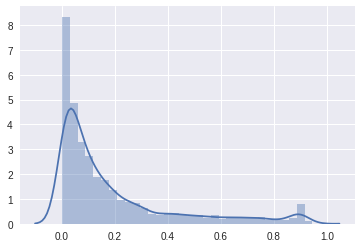

In [126]:
sns.distplot(y_pred)

In [129]:
f_ypred = y_pred > .5
f_ypred[:2]

array([[False],
       [False]])

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [136]:
f_ypred = [1 if i > .5 else 0 for i in y_pred]
confusion_matrix(y_test, f_ypred)

array([[2303,   76],
       [ 336,  285]])

In [148]:
f_ypred = [1 if i > .8 else 0 for i in y_pred]
confusion_matrix(y_test, f_ypred)

array([[2373,    6],
       [ 499,  122]])